In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing

In [2]:
win = pd.read_csv('C:\\Users\\cocob\\Downloads\\winequality-red.csv', encoding = "ISO-8859-1")

Outcome Variable is quality; other variables of interest are residual sugar, alcohol, ph, and density

In [3]:
win.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
win.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

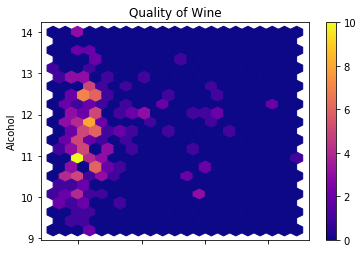

In [5]:
win2=win[win['quality'] > 6.99999]
win2.plot.hexbin(x='residual sugar', y='alcohol', gridsize=20, cmap='plasma')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.title('Quality of Wine')
plt.show()

In [12]:
win2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7


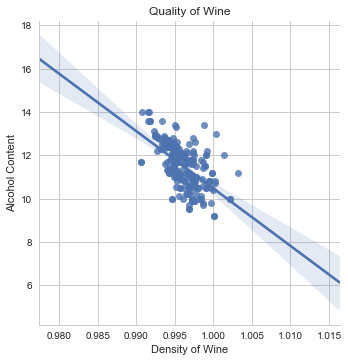

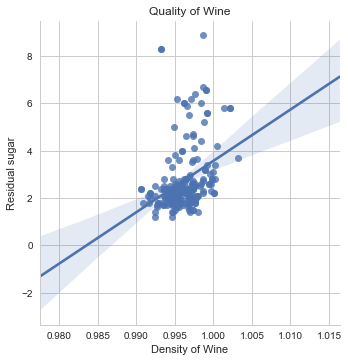

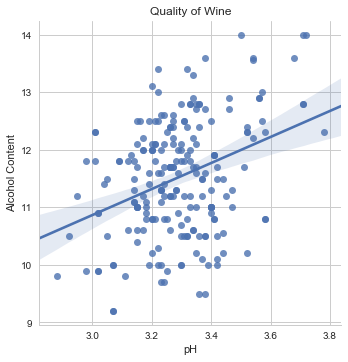

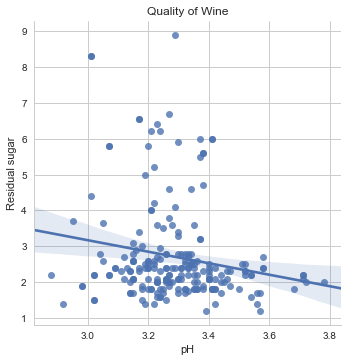

In [6]:
win2=win[win['quality'] > 6.99999]
sns.set(style= 'whitegrid')
win3=sns.lmplot(x='density', y='alcohol', data=win2, fit_reg=True)
win3.set_xlabels('Density of Wine')
win3.set_ylabels('Alcohol Content')
plt.title('Quality of Wine')
plt.show()

win6=sns.lmplot(x='density', y='residual sugar', data=win2, fit_reg=True)
win6.set_xlabels('Density of Wine')
win6.set_ylabels('Residual sugar')
plt.title('Quality of Wine')
plt.show()

win11=sns.lmplot(x='pH', y='alcohol', data=win2, fit_reg=True)
win11.set_xlabels('pH')
win11.set_ylabels('Alcohol Content')
plt.title('Quality of Wine')
plt.show()

win12=sns.lmplot(x='pH', y='residual sugar', data=win2, fit_reg=True)
win12.set_xlabels('pH')
win12.set_ylabels('Residual sugar')
plt.title('Quality of Wine')
plt.show()

In [7]:
win5= win2.groupby(['quality'])['residual sugar'].sum().reset_index()
win5.describe()

win6= win2.groupby(['quality'])['alcohol'].sum().reset_index()
win6.describe()

,quality,alcohol
count,2.000000,2.000000
mean,7.500000,1249.708333
std,0.707107,1459.480181
min,7.000000,217.700000
25%,7.250000,733.704167
50%,7.500000,1249.708333
75%,7.750000,1765.712500
max,8.000000,2281.716667


In [8]:
win8=win[win['quality'] > 6.99999].sort_values(['residual sugar', 'alcohol'])
win8.mean()

fixed acidity            8.847005
volatile acidity         0.405530
citric acid              0.376498
residual sugar           2.708756
chlorides                0.075912
free sulfur dioxide     13.981567
total sulfur dioxide    34.889401
density                  0.996030
pH                       3.288802
sulphates                0.743456
alcohol                 11.518049
quality                  7.082949
dtype: float64

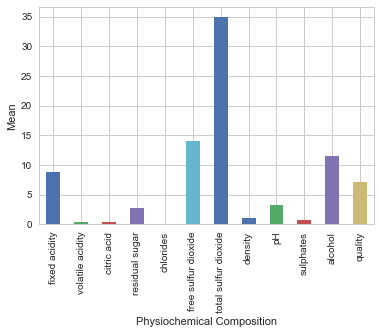

In [9]:
win9= win2.mean()
win9.plot(kind='bar')
plt.xlabel('Physiochemical Composition')
plt.ylabel('Mean')
plt.show()

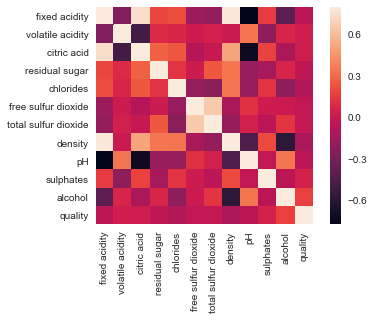

In [11]:
corrmat = win2.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

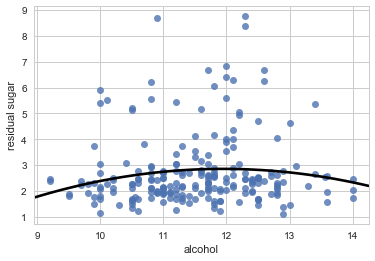

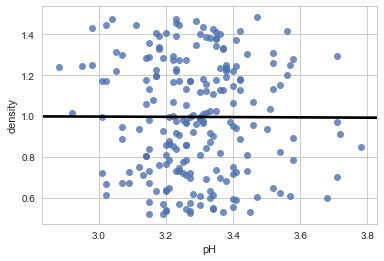

In [28]:
sns.regplot(win2['alcohol'], y=win2['residual sugar'], y_jitter=.49, order=2, line_kws={'color':'black'}, ci=None)
plt.show()

sns.regplot(win2['pH'], y=win2['density'], y_jitter=.49, order=2, line_kws={'color':'black'}, ci=None)
plt.show()

In [40]:
win10=win2.describe()

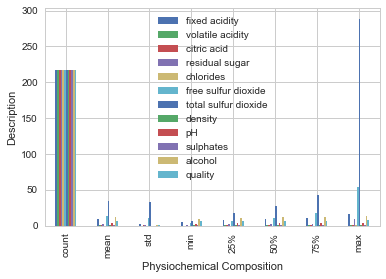

In [41]:
win10.plot(kind='bar',)
plt.xlabel('Physiochemical Composition')
plt.ylabel('Description')
plt.show()